In [36]:
import matplotlib as mpl
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

import matplotlib.pyplot as plt

# These are constants used in the following functions
PI=np.pi
PI2 = 2*np.pi

### Converting from Spherical to Cartesian and Back

This notebook uses the conventions as described in: http://mathworld.wolfram.com/SphericalCoordinates.html

In [37]:
def spherical_to_cartesian(r, theta, phi):
    """
    Convert from spherical to cartesian coordinates
       theta - azimut
       phi - inclination
    """
    x = r * np.cos(theta) * np.sin(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(phi)
    return x, y, z

def cartesian_to_spherical(x, y, z):
    """
    Convert from cartesian to spherical
    """
    r = np.sqrt(np.square(x) + np.square(y) + np.square(z))
    if r == 0:
        return 0, 0, 0
    phi = np.acos(z,r)
    theta = np.atan2(y, x)
    return r, theta, phi

def scale(array, low, high):
    """
    Scales an array between low and high
    """
    minv = min(array)
    maxv = max(array)
    return (array - minv) / (maxv - minv) * (high - low) + low

### Displaying Curves and Surphases using Spherical Coordinates

In [38]:
def plot_curve(ax, r, theta, phi, **options):
    """
    Plot a curve on the axes ax
    """
    x, y, z = spherical_to_cartesian(r, theta, phi)
    ax.plot(x, y, z, **options)

In [39]:
def plot_surface(ax, r, theta, phi, **options):
    """
    Plot a surface
    """
    x = r * np.outer(np.cos(theta), np.sin(phi))
    y = r * np.outer(np.sin(theta), np.sin(phi))
    z = r * np.outer(np.ones(np.size(theta)), np.cos(phi))
    ax.plot_surface(x, y, z, rstride = 4, cstride = 4, linewidth = 2, **options)

In [56]:
def plot_sector(ax, r, start_theta = 0, end_theta = PI2, **options):
    N = 100
    sector_theta = np.linspace(start_theta, end_theta, N)
    sector_phi = np.linspace(0, np.pi, N)
    plot_surface(ax, r, sector_theta, sector_phi, **options)

In [41]:
def plot_beach_ball():
    colors = 'bwywmw'
    for i in range(0, 6):
        start = PI2 / 6 * i
        end = start + PI2 / 6
        plot_sector(ax, 1, start, end, color= colors[i], alpha = 1)        

<IPython.core.display.Javascript object>


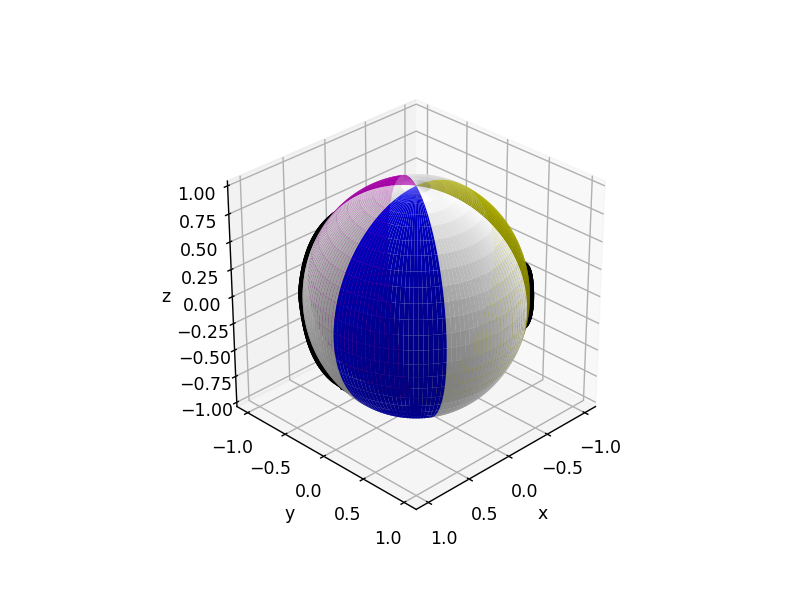

In [42]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect('equal')
ax.view_init(elev = 30, azim = 45)
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
plot_beach_ball()
plt.show()

### Tennis Ball Groove Rendering

The groove on the tennis ball is a sequence of circle arcs connected together.

In [43]:
# Create the pattern on the baseball/tennis ball
n = 50
rho = 4
delta = 1
mu = np.sqrt(rho ** 2 - delta ** 2)
y1 = np.linspace(delta + rho, 0, n)
x1 = np.sqrt(rho ** 2 - np.square(y1 - delta))
y2 = np.linspace(0, - delta - rho, n)
x2 = - np.sqrt(rho ** 2 - np.square(y2 + delta)) + 2 * mu
x3 = np.vstack([x1, x2]).reshape(-1)
y3 = np.vstack([y1, y2]).reshape(-1)
y4 = y3[::-1]
x4 = (-x3 + 4 * mu)[::-1]
x = np.vstack([x3, x4, x3 + 4 * mu, x4 + 4 * mu]).reshape(-1)
y = np.vstack([y3, y4, y3, y4]).reshape(-1)

<IPython.core.display.Javascript object>


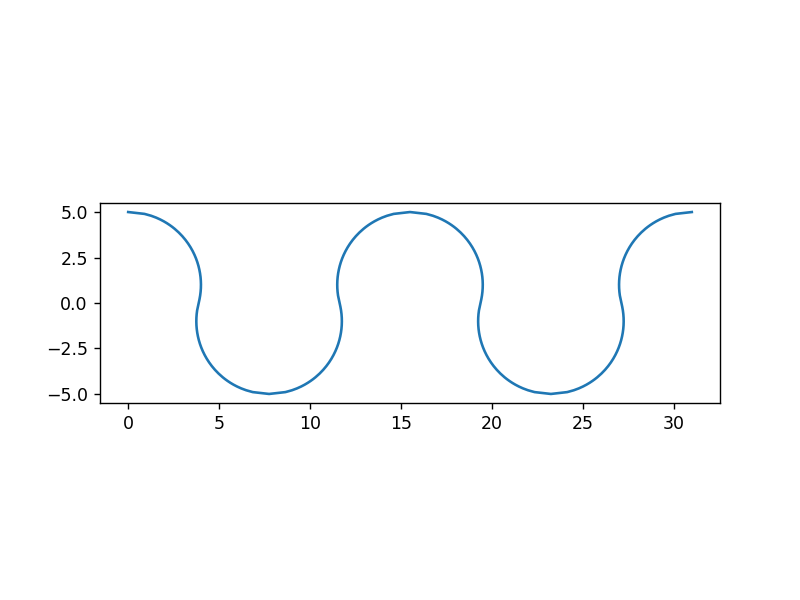

In [44]:
fig2 = plt.figure()
ax2 = fig2.gca()
ax2.set_aspect('equal')

ax2.plot(x, y)

In [52]:
# Convert the X/Y rendering of the pattern to poloar coordinates
r = 1
theta = PI * 2 * x / (8 * mu)
phi = scale(y, PI / 4, PI - PI / 4)

<IPython.core.display.Javascript object>


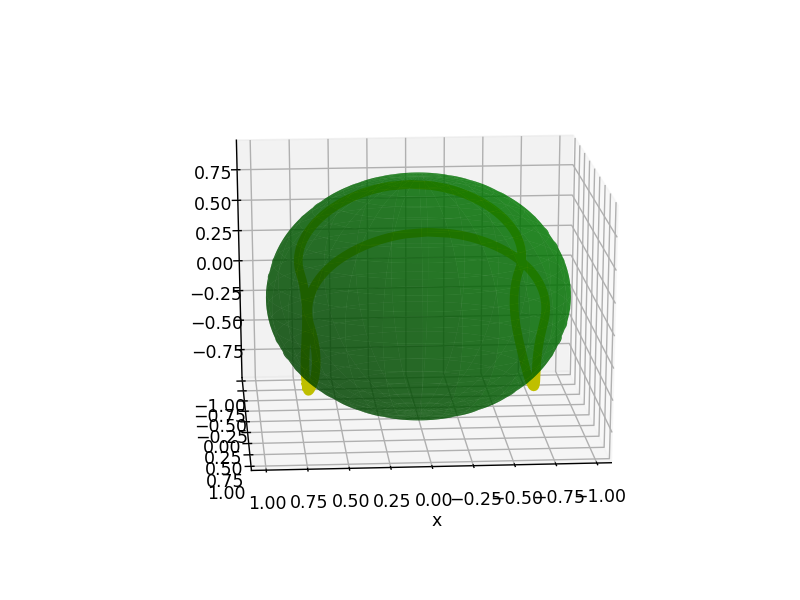

In [61]:
fig3 = plt.figure()
ax3 = fig3.gca(projection='3d')
# ax.set_aspect('equal')
ax3.view_init(elev = 30, azim = 45)
ax3.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
plt.show()
plot_sector(ax3, 0.95, color = 'g', alpha= 0.6)
plot_curve(ax3, 1, theta, phi, color = 'y', linewidth = 5)